# ЦЕНТРАЛЬНАЯ ПРЕДЕЛЬНАЯ ТЕОРИЯ
### Проверка центральной предельной теории с помощью экспоненциального распределения

In [1]:
import numpy as np
from scipy.stats import expon
from matplotlib import pyplot as plt
from math import exp, pi, sqrt
from IPython.display import IFrame

url = 'https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5'
IFrame(url, width=1000, height=400)

Функция expon генерирует экспоненциальное распределение, параметр scale, равный 1 по умолчанию, принимает значение 1 / lambda

In [2]:
lam = 1.25
expon_rv = expon(scale=1/lam)
expon_test = expon_rv.rvs(1000) # создаём выборку объёмом 1000

Посчитаем математическое ожидание и дисперсию по формулам: 
$$E[X] = \frac{1}{\lambda}$$
$$D[X] = \frac{1}{\lambda^2}$$

In [3]:
expon_mean = 1 / lam
expon_var = 1 / lam**2
print 'Мат. ожидание:', expon_mean, '\nДисперсия:', expon_var

Мат. ожидание: 0.8 
Дисперсия: 0.64


Далее построим график функции экспоненчиального распределения

Text(0.5,0,'$x$')

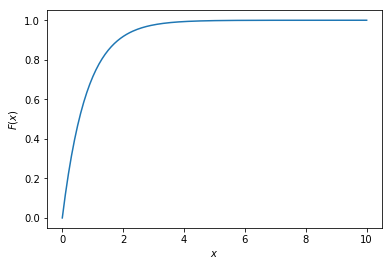

In [4]:
x1 = np.linspace(0,10,200)
cdf_test1 = expon_rv.cdf(x1)
plt.plot(x1, cdf_test1, label='x1')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Теперь посмотрим график плоности нашей функции распределения и гистограмму

D:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$x$')

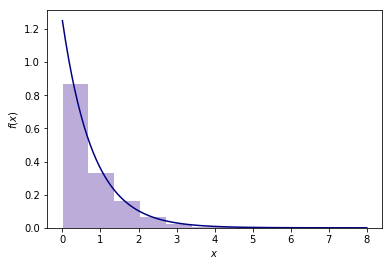

In [5]:
x = np.linspace(0,8,100)
pdf = expon_rv.pdf(x)
plt.hist(expon_test, normed=True, color='#bbacd9')
plt.plot(x, pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Так как мы будем генерировать выборку из средних при различных значениях n, создадим функцию norm_from_other, принимающую на вход объём выборок (size) и тип распределения (rv), и с её помощью будем генерировать выборки средних в виде numpy.array

In [6]:
def norm_from_other(size, rv):
    rv_to_norm = []
    for i in range(1000):
        rv_to_norm.append(sum(rv.rvs(size))/size)
    return np.array(rv_to_norm)

Также создадим функцию, которая будет считать плотность нормального распределения

In [7]:
def impro_pdf(x, mean, var):
    return 1 / sqrt(var * 2 * pi) * exp(-1 * (x - mean)**2 / (2 * var))

Объём выборок в первом наборе = 5, мат. ожидание берём от исходного распределния, а дисперсию получаем путём деления дисперсии исходной функции на объём выборок, согласно ЦПТ

In [8]:
n1 = 5
n1_var = expon_var / n1
print 'Мат. ожидание при n = 5:', expon_mean, '\nДисперсия при n = 5:', n1_var

Мат. ожидание при n = 5: 0.8 
Дисперсия при n = 5: 0.128


Далее построим график и гистограмму плотности получившегося распределения, уже при n = 5 оно напоминает нормальное распределения, сдвинутое влево

Text(0.5,0,'$x$')

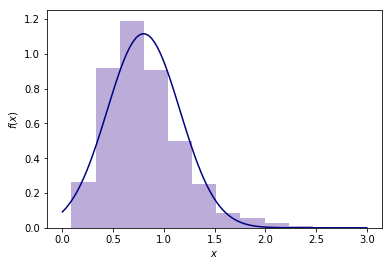

In [9]:
exp_norm5 = norm_from_other(n1, expon_rv)
plt.hist(exp_norm5, normed=True, color='#bbacd9')
x = np.linspace(0,3,100)
n1_pdf = np.array([impro_pdf(i, expon_mean, n1_var) for i in x])
plt.plot(x, n1_pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Повторим ту же процедуру для выборок, увеличивая значение n и понаблюдаем за графиками

In [10]:
n2 = 10
n2_var = expon_var / n2
print 'Мат. ожидание при n = 10:', expon_mean, '\nДисперсия при n = 10:', n2_var

Мат. ожидание при n = 10: 0.8 
Дисперсия при n = 10: 0.064


В данном примере мы видим, как увеличивает точность аппроксимации распределения и сужается график, в последующих примерах мы увидим ещё большую разницу

Text(0.5,0,'$x$')

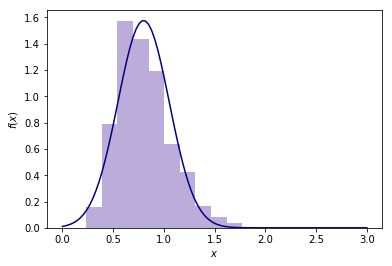

In [11]:
exp_norm10 = norm_from_other(n2, expon_rv)
plt.hist(exp_norm10, normed=True, color='#bbacd9')
n2_pdf = np.array([impro_pdf(i, expon_mean, n2_var) for i in x])
plt.plot(x, n2_pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [12]:
n3 = 50
n3_var = expon_var / n3
print 'Мат. ожидание при n = 50:', expon_mean, '\nДисперсия при n = 50:', n3_var

Мат. ожидание при n = 50: 0.8 
Дисперсия при n = 50: 0.0128


Text(0.5,0,'$x$')

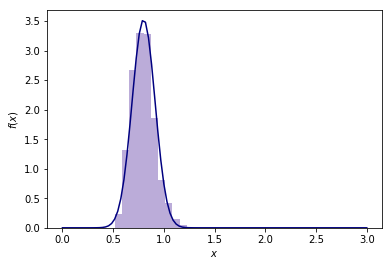

In [13]:
exp_norm50 = norm_from_other(50, expon_rv)
plt.hist(exp_norm50, normed=True, color='#bbacd9')
n3_pdf = np.array([impro_pdf(i, expon_mean, n3_var) for i in x])
plt.plot(x, n3_pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [14]:
n4 = 100
n4_var = expon_var / n4
print 'Мат. ожидание при n = 100:', expon_mean, '\nДисперсия при n = 100:', n4_var

Мат. ожидание при n = 100: 0.8 
Дисперсия при n = 100: 0.0064


Text(0.5,0,'$x$')

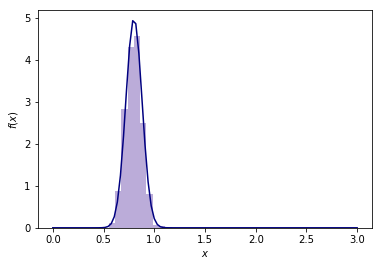

In [15]:
exp_norm100 = norm_from_other(100, expon_rv)
plt.hist(exp_norm100, normed=True, color='#bbacd9')
n4_pdf = np.array([impro_pdf(i, expon_mean, n4_var) for i in x])
plt.plot(x, n4_pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [16]:
n5 = 1000
n5_var = expon_var / n5
print 'Мат. ожидание при n = 1000:', expon_mean, '\nДисперсия при n = 1000:', n5_var

Мат. ожидание при n = 1000: 0.8 
Дисперсия при n = 1000: 0.00064


Text(0.5,0,'$x$')

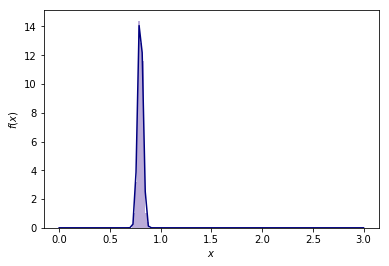

In [17]:
exp_norm1000 = norm_from_other(1000, expon_rv)
plt.hist(exp_norm1000, normed=True, color='#bbacd9')
n5_pdf = np.array([impro_pdf(i, expon_mean, n5_var) for i in x])
plt.plot(x, n5_pdf, color='#000080')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

На основе предыдущих примеров можно увидеть, что рост точности аппросимации замедляется, например разница между графиками при n = 10 и n = 50 куда заметнее, чем разница между 50 и 100

Следующий график приведён для наглядности данного свойства, при n = 1000 график заметно стал уже, но не настолько сильно, как мог, если бы рост точности аппросимации принимал бы значение как при разнице между 10 и 50

Точность гистограмм и графиков в увеличением n всё больше совпадает

Увеличение точности аппроксимации графиков обусловлено увеличением количества различных значений в выбор, соотвественно, средние значения разных выборок становятся всё более схожи, отсюда мы можем также заметить рост значения f(x)